### Linear Regression

Let's set up our workspace and use the **Diabetes dataset** from `scikit-learn`. This dataset contains 10 baseline variables (e.g., age, sex, BMI) and a quantitative measure of disease progression one year after baseline.

Here, we will model diabetes progression (continuous outcome) based on various health-related factors.

# Assignment 2

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [1]:
# Import standard libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes_data = load_diabetes()

# Convert to DataFrame
diabetes_df = pd.DataFrame(diabetes_data.data, columns=diabetes_data.feature_names)

# Bind the disease progression (diabetes target) to the DataFrame
diabetes_df['progression'] = diabetes_data.target


# Display the DataFrame
diabetes_df


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


#### **Question 1:** 
#### Data inspection

Before fitting any model, it is essential to understand our data. **Use Python code** to answer the following questions about the **Diabetes dataset**:

_(i)_ How many observations (rows) does the dataset contain?

In [3]:
# 442 observations

diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          442 non-null    float64
 1   sex          442 non-null    float64
 2   bmi          442 non-null    float64
 3   bp           442 non-null    float64
 4   s1           442 non-null    float64
 5   s2           442 non-null    float64
 6   s3           442 non-null    float64
 7   s4           442 non-null    float64
 8   s5           442 non-null    float64
 9   s6           442 non-null    float64
 10  progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


442 rows

_(ii)_ How many variables (columns) does the dataset contain?

11 variables (10 input variables, 1 response variable)


In [4]:
diabetes_df.shape[1]
i = 1
for x in diabetes_df.head(0):
    print( i, x)
    i +=1
    if i>=13: quit

1 age
2 sex
3 bmi
4 bp
5 s1
6 s2
7 s3
8 s4
9 s5
10 s6
11 progression


_(iii)_ What is the 'variable type' of the response variable `progression` (e.g., 'integer', 'category', etc.)?

float

In [10]:
type(diabetes_df['progression'][10])

numpy.float64

_(iv)_ How many predictor variables do we have (Hint: all variables other than `progression`)? 

10

You can use `print()` and `describe()` to help answer these questions.

#### **Question 2:** 
#### Data-visualization

Before we fit and review model outputs, we should visualize our data. Review the code and plot, shown below. Answer the following questions:

_(i)_ Describe the associations being plotted ? (i.e., positive association, negative association, no association)


> Your answer here...

_(ii)_ What concept ‘defines’ the plotted line?

> Your answer here...

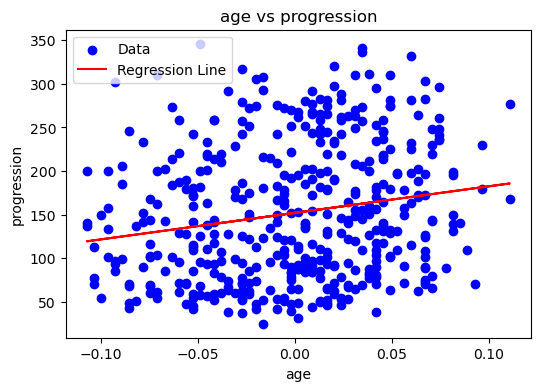

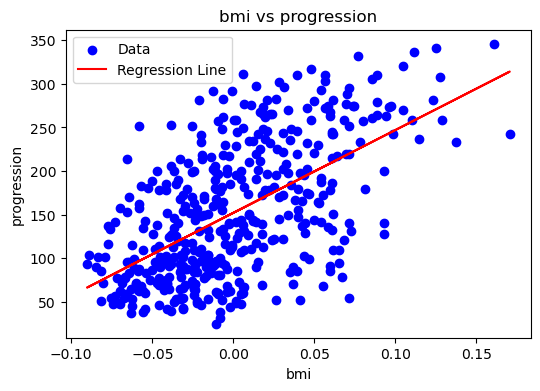

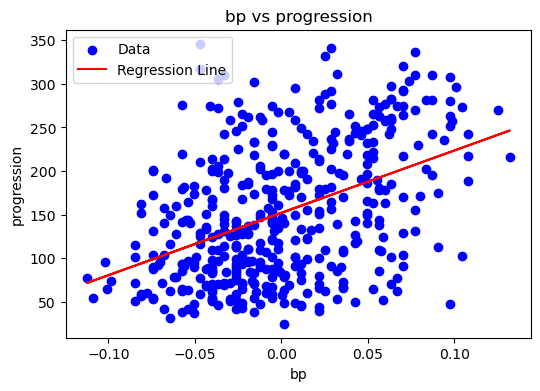

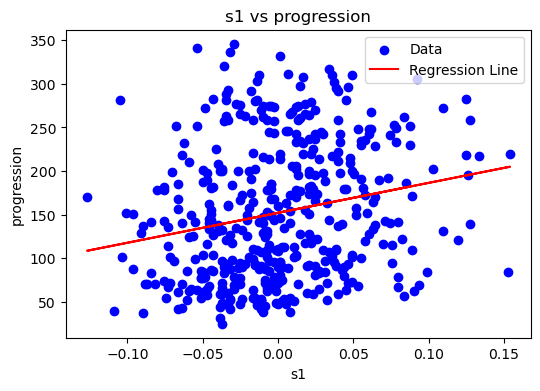

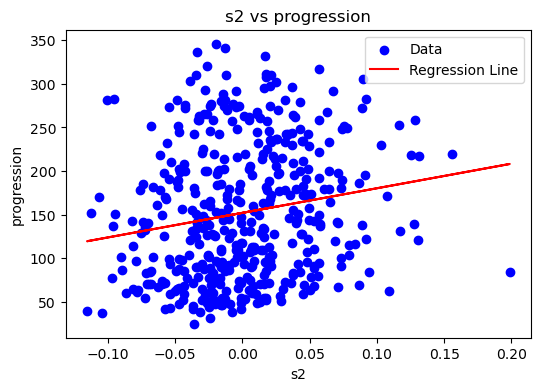

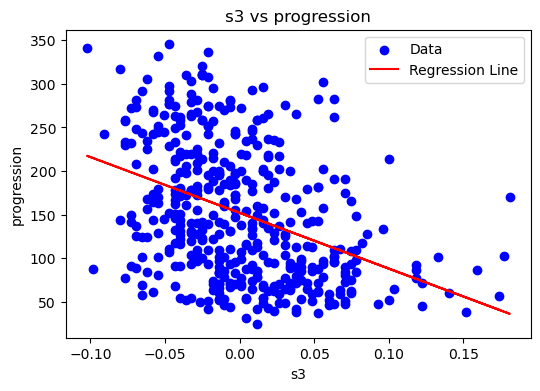

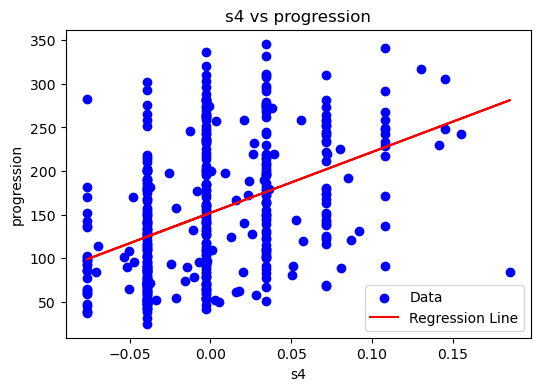

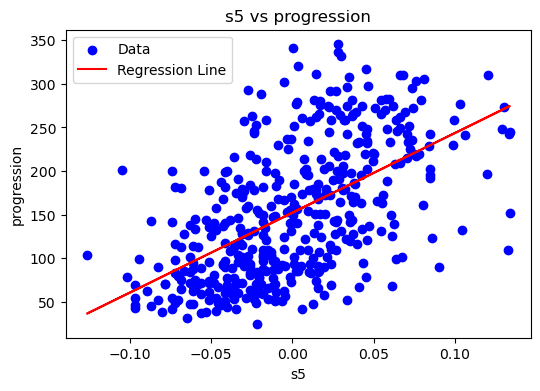

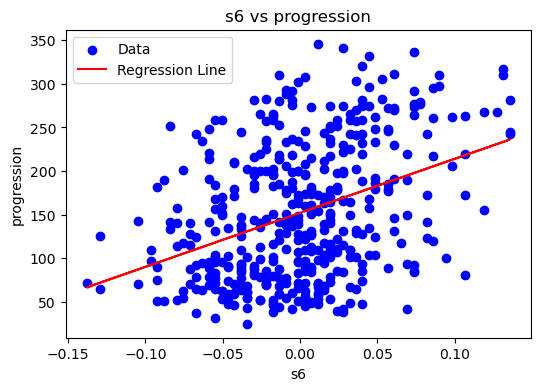

In [29]:
# Exclude the 'sex' column from the feature names since it's categoricla and we are plotting continuous relationships
feature_names = diabetes_df.columns.difference(['progression', 'sex'])

# Loop through each feature (column) in diabetes_df
for feature in feature_names:
    # Extract the feature column and target variable (progression)
    X_feature = diabetes_df[[feature]].values  # Extract as a 2D array
    y = diabetes_df['progression'].values  # Target variable
    
    # Create a scatter plot for the feature against the target (progression)
    plt.figure(figsize=(6, 4))
    plt.scatter(X_feature, y, label='Data', color='blue')

    # Fit a linear regression model
    lm = LinearRegression()
    lm.fit(X_feature, y)

    # Plot the regression line
    plt.plot(X_feature, lm.predict(X_feature), color='red', label='Regression Line')

    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel('progression')
    plt.title(f'{feature} vs progression')

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

Consider the variables plotted above. In the context of the `Diabetes` dataset:

(iii) What is the (implied) null hypothesis? What is the (implied) alternative hypothesis?


> Your answer here...

#### **Question 3:** 
#### Model fit
Now, let’s fit a multivariable linear regression model, using the general syntax lm(). As above, use progression as the response variable Y, and all other variables as the predictors.

**Step 1: Split the dataset into test and train.**

In [6]:
# Select predictors (excluding the last column)
predictors = diabetes_df.iloc[:, :-1]

# Create a random vector of True and False values to split the data
split = np.random.choice([True, False], size=len(predictors), replace=True, p=[0.75, 0.25])


diabetes_train = diabetes_df[split]
diabetes_test = diabetes_df[~pd.Series(split)]

**Step 2: Fit the linear regression model.**

In [ ]:
# fit the linear regression model
# Your code here...

# Create a DataFrame containing the slope (coefficients) and intercept
coefficients_df = pd.DataFrame({"predictor": predictor_variables, "slope": lm.coef_, "intercept": [lm.intercept_] * len(lm.coef_)})

# Display the coefficients DataFrame
print(coefficients_df)

# lm.coef_ gives the coefficients for each predictor (change in diabetes progression per unit change in each predictor variable)
# lm.intercept_ gives the intercept b_0 (the predicted diabetes progression when all predictors are set to 0)

#### **Question 4:** 
#### Model evaluation
**Step 3. Finally, we predict on the test data set to assess how well our model does.** 

We will evaluate our final model's test error measured by RMSP.

In [61]:
# Your code here ...


0.9777777777777777

# Criteria

| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is inspected for the number of variables, observations, and data types. | Data inspection is missing or incomplete.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots, histograms) are properly interepreted to explore the relationships between variables. | Data visualization were not correctly interpreted. |
| **Model Initialization**                               | The linear regression model is correctly initialized.            | The linear regression model is not initialized or is incorrect. |
| **Model Evaluation on Test Data**                      | The model is evaluated on the test data using appropriate metrics (e.g., RMSE). | The model evaluation is missing or uses the wrong metric. |


## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-4-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
